# TO EXPLAIN

Data source https://www.gov.uk/government/statistical-data-sets/price-paid-data-downloads

In [5]:
from config import *
import pandas as pd
import numpy as np

In [6]:
#import ipython_memory_usage 

In [7]:
whos

Variable       Type      Data/Info
----------------------------------
COLUMNS        list      n=16
PICKLE         str       /home/ian/data/land_regis<...>pp-complete-202103.pickle
PICKLE_PROT4   str       /home/ian/data/land_regis<...>plete-202103-prot4.pickle
RAW_DATA       str       /home/ian/data/land_regis<...>03/pp-complete-202103.csv
ROOT           str       /home/ian/data/land_registry/202103
np             module    <module 'numpy' from '/ho<...>kages/numpy/__init__.py'>
os             module    <module 'os' from '/home/<...>021/lib/python3.8/os.py'>
pd             module    <module 'pandas' from '/h<...>ages/pandas/__init__.py'>


In [8]:
#df = pd.read_csv(DATA_CSV) # 132 sec
df = pd.read_pickle(PICKLE) # 30 sec

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25836876 entries, 0 to 25836875
Data columns (total 16 columns):
 #   Column    Dtype         
---  ------    -----         
 0   tin       object        
 1   price     int64         
 2   date      datetime64[ns]
 3   postcode  object        
 4   pt        object        
 5   new       object        
 6   duration  object        
 7   paon      object        
 8   saon      object        
 9   street    object        
 10  locality  object        
 11  town      object        
 12  district  object        
 13  county    object        
 14  ppd_cat   object        
 15  status    object        
dtypes: datetime64[ns](1), int64(1), object(14)
memory usage: 3.1+ GB


In [10]:
df.head()

,tin,price,date,postcode,pt,new,duration,paon,saon,street,locality,town,district,county,ppd_cat,status
0,{A42E2F04-2538-4A25-94C5-49E29C6C8FA8},18500,1995-01-31,TQ1 1RY,F,N,L,VILLA PARADISO,FLAT 10,HIGHER WARBERRY ROAD,TORQUAY,TORQUAY,TORBAY,TORBAY,A,A
1,{1BA349E3-2579-40D6-999E-49E2A25D2284},73450,1995-10-09,L26 7XJ,D,Y,F,6,NaN,CATKIN ROAD,LIVERPOOL,LIVERPOOL,KNOWSLEY,MERSEYSIDE,A,A
2,{E5B50DCB-BC7A-4E54-B167-49E2A6B4148B},59000,1995-03-31,BH12 2AE,D,N,F,28,NaN,ALDER ROAD,POOLE,POOLE,POOLE,POOLE,A,A
3,{81E50116-D675-4B7F-9F8D-49E2B5D43271},31000,1995-12-04,IP13 0DR,D,Y,F,NONSUCH COTTAGE,NaN,THE STREET,HACHESTON,WOODBRIDGE,SUFFOLK COASTAL,SUFFOLK,A,A
4,{B97455B9-75CB-40BB-A615-42C53683E143},95000,1995-09-22,WS14 0BE,D,N,F,FOX COVER COTTAGE,NaN,HALL LANE,LICHFIELD,LICHFIELD,LICHFIELD,STAFFORDSHIRE,A,A


In [11]:
df.price.describe()

count    2.583688e+07
mean     2.016602e+05
std      7.838686e+05
min      1.000000e+00
25%      8.000000e+04
50%      1.400000e+05
75%      2.310000e+05
max      5.943000e+08
Name: price, dtype: float64

# What if we change dtypes?

In [23]:
df_few_cols = df[['county', 'pt', 'date', 'price']]
df_few_cols.head()

,county,pt,date,price
0,TORBAY,F,1995-01-31,18500
1,MERSEYSIDE,D,1995-10-09,73450
2,POOLE,D,1995-03-31,59000
3,SUFFOLK,D,1995-12-04,31000
4,STAFFORDSHIRE,D,1995-09-22,95000


In [24]:
df_few_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25836876 entries, 0 to 25836875
Data columns (total 4 columns):
 #   Column  Dtype         
---  ------  -----         
 0   county  object        
 1   pt      object        
 2   date    datetime64[ns]
 3   price   int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 788.5+ MB


In [25]:
df_few_cols.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25836876 entries, 0 to 25836875
Data columns (total 4 columns):
 #   Column  Dtype         
---  ------  -----         
 0   county  object        
 1   pt      object        
 2   date    datetime64[ns]
 3   price   int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 3.4 GB


In [26]:
#df_few_cols = df[['county', 'pt', 'date', 'price']]
print(f"New dataframe has shape {df_few_cols.shape}")
# string columns are mis-represented with deep=True)
df_few_cols.memory_usage(index=False)

New dataframe has shape (25836876, 4)


county    206695008
pt        206695008
date      206695008
price     206695008
dtype: int64

In [28]:
25836876 * 8 == 206695008 # 8 bytes

True

In [29]:
df_few_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25836876 entries, 0 to 25836875
Data columns (total 4 columns):
 #   Column  Dtype         
---  ------  -----         
 0   county  object        
 1   pt      object        
 2   date    datetime64[ns]
 3   price   int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 788.5+ MB


In [30]:
np.dtype('datetime64[ns]') == np.dtype('<M8[ns]') # 8byte datetime
df_few_cols.pt.dtype, df_few_cols.date.dtype, df_few_cols.price.dtype, 

(dtype('O'), dtype('<M8[ns]'), dtype('int64'))

In [31]:
df_slimmer_cols = pd.DataFrame({'county_cat': df_few_cols.county.astype('category'),
                                'pt_cat': df_few_cols.pt.astype('category'),
                                'date_cat': df_few_cols.date.astype('category'),
                                'price_i32': df_few_cols.price.astype('int32')})

In [32]:
# ask for deep=True to get the true string cost
df_slimmer_cols.memory_usage(deep=True, index=False)

county_cat     51686761
pt_cat         25837338
date_cat       52014088
price_i32     103347504
dtype: int64

In [33]:
df_slimmer_cols.info(memory_usage=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25836876 entries, 0 to 25836875
Data columns (total 4 columns):
 #   Column      Dtype   
---  ------      -----   
 0   county_cat  category
 1   pt_cat      category
 2   date_cat    category
 3   price_i32   int32   
dtypes: category(3), int32(1)
memory usage: 222.1 MB


In [34]:
assert (df_slimmer_cols.date_cat == df_few_cols.date).all()
assert (df_slimmer_cols.county_cat == df_few_cols.county).all()
assert (df_slimmer_cols.pt_cat == df_few_cols.pt).all()
assert (df_slimmer_cols.price_i32 == df_few_cols.price).all()

df_slimmer_cols.memory_usage(index=False)

county_cat     51678944
pt_cat         25837088
date_cat       52014088
price_i32     103347504
dtype: int64

In [35]:
df_slimmer_cols.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25836876 entries, 0 to 25836875
Data columns (total 4 columns):
 #   Column      Dtype   
---  ------      -----   
 0   county_cat  category
 1   pt_cat      category
 2   date_cat    category
 3   price_i32   int32   
dtypes: category(3), int32(1)
memory usage: 222.1 MB


In [36]:
%time df_few_cols.pt.value_counts()

CPU times: user 2.21 s, sys: 9.11 ms, total: 2.22 s
Wall time: 2.21 s


T    7807661
S    7095005
D    5951662
F    4659506
O     323042
Name: pt, dtype: int64

In [37]:
%time df_slimmer_cols.pt_cat.value_counts()

CPU times: user 126 ms, sys: 48.5 ms, total: 175 ms
Wall time: 174 ms


T    7807661
S    7095005
D    5951662
F    4659506
O     323042
Name: pt_cat, dtype: int64

In [38]:
%time df_few_cols.groupby('pt').size().sort_values(ascending=False)

CPU times: user 1.7 s, sys: 356 ms, total: 2.05 s
Wall time: 2.04 s


pt
T    7807661
S    7095005
D    5951662
F    4659506
O     323042
dtype: int64

In [39]:
%time df_slimmer_cols.groupby('pt_cat').size().sort_values(ascending=False)

CPU times: user 217 ms, sys: 36.2 ms, total: 253 ms
Wall time: 251 ms


pt_cat
T    7807661
S    7095005
D    5951662
F    4659506
O     323042
dtype: int64

In [40]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
res = df_slimmer_cols.query("date_cat.dt.year<2020").date_cat.dt.year.value_counts().sort_index()
res.plot(kind="bar", ax=ax)

ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
fig, ax = plt.subplots()
res = df_slimmer_cols.query("date_cat.dt.year==2020").date_cat.dt.month.value_counts().sort_index()
res.plot(kind="bar", ax=ax)
ax.set(title='Monthly sales for 2020\nNote circa 3 month reporting lag\nLockdown in March');

## groupby pt year

In [ ]:
df['year'] = df.date.dt.year

In [ ]:
gpby = df.groupby(['year', 'pt'])
nbr_sales_per_year = gpby.size()
# (T)erraced, (S)emi, (D)etached, (F)lat/appartment, (O)ther

In [ ]:
# sort by approx display order
sorted_index = nbr_sales_per_year.unstack().mean().sort_values(ascending=False).index
nbr_sales_per_year = nbr_sales_per_year.unstack().T.loc[sorted_index].T
nbr_sales_per_year.index.name="Year"

In [ ]:
nbr_sales_per_year = nbr_sales_per_year.rename(columns={'T': 'Terraced', 'S': 'Semi', 'D': 'Detached', 'F': 'Flat', 'O': 'Other'})

In [ ]:
fig, ax = plt.subplots()
nbr_sales_per_year.plot(ax=ax, marker='o')
ax.set_title("House types total sales by year\nNote the 'Great Recession'")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='y') # horizontal grid lines only
import matplotlib as mpl
ax.get_yaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_ylabel("Number of sales");
ax.axvline(2007, color='grey', linestyle='--')
#ax.legend(frameon=False)

# Paon

In [ ]:
def c(item):
    try:
        # could be "Severn Court" or "22" or missing
        return int(item)
    except ValueError:
        return np.NaN
    
%time df['paon_nbr'] = df['paon'].apply(c).astype('Int64')

In [ ]:
df['paon_nbr'].value_counts(dropna=False)[:3]

In [ ]:
df['paon_nbr'].value_counts(dropna=False).sort_index()[1:30].plot(kind='bar')

# Math speed

In [ ]:
# no useful speedup on int
pd.options.compute.use_bottleneck=False
pd.options.compute.use_numexpr=False
%timeit df.price.mean()

In [ ]:
pd.options.compute.use_bottleneck=True
%timeit df.price.mean()

In [ ]:
%timeit df.price.to_numpy().mean()

In [ ]:
%timeit np.nanmean(df.price.to_numpy())

In [ ]:
df['price_f64'] = df.price.astype('float64')
assert (df.price == df.price_f64).all()
assert (df.price_f64.isnull() == False).all()

In [ ]:
# affects float, much less for int
pd.options.compute.use_bottleneck=False
%timeit df.price_f64.mean()

In [ ]:
%timeit np.nanmean(df.price_f64.to_numpy())

In [ ]:
assert np.isnan(np.mean(   np.array([np.nan, 1, 2, 3])))
assert   2.0 == np.nanmean(np.array([np.nan, 1, 2, 3]))

In [ ]:
pd.options.compute.use_bottleneck=True
%timeit df.price_f64.mean()

In [ ]:
%timeit df.price_f64.to_numpy().mean()

# Experiments

In [43]:
df_few_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25836876 entries, 0 to 25836875
Data columns (total 4 columns):
 #   Column  Dtype         
---  ------  -----         
 0   county  object        
 1   pt      object        
 2   date    datetime64[ns]
 3   price   int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 788.5+ MB


In [48]:
f"{df_few_cols.memory_usage(deep=True).sum():,}"

'3,693,118,607'

In [44]:
df_slimmer_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25836876 entries, 0 to 25836875
Data columns (total 4 columns):
 #   Column      Dtype   
---  ------      -----   
 0   county_cat  category
 1   pt_cat      category
 2   date_cat    category
 3   price_i32   int32   
dtypes: category(3), int32(1)
memory usage: 222.1 MB


In [102]:
df_recent = df_few_cols.query('date > "2010-01-01"')
df_recent = df_recent.sort_values('date')
print(f"We have {df_recent.shape[0]:,} examples")
df_recent.sample(5)

We have 9,612,901 examples


,county,pt,date,price
21530298,BRACKNELL FOREST,T,2016-04-29,296500
23360406,GREATER LONDON,F,2018-06-15,600000
22465995,WEST MIDLANDS,D,2017-10-16,229950
22913225,WEST MIDLANDS,S,2017-12-12,158000
17012398,ESSEX,S,2011-06-10,224000


In [84]:
#dfx = df_few_cols
def count_large(ser):
    return (ser > 500_000).sum() / ser.shape[0]

In [85]:
%%time

df_recent.groupby('pt')['price'].apply(count_large)

CPU times: user 821 ms, sys: 284 ms, total: 1.1 s
Wall time: 1.08 s


pt
D    0.172215
F    0.096627
O    0.294836
S    0.048067
T    0.052949
Name: price, dtype: float64

In [92]:
df_recent_copy = df_recent.copy()
df_recent_copy.sample(5)

,county,pt,date,price
17932305,LEICESTERSHIRE,T,2012-06-01,190500
21493817,SWINDON,T,2016-03-21,167500
23673638,HERTFORDSHIRE,T,2018-04-17,399995
19221417,SOMERSET,S,2014-03-31,150000
24758281,GREATER MANCHESTER,O,2019-11-15,100000


In [86]:
df_recent_copy['price_large'] = df_recent_copy.price > 500_000
df_recent_copy.groupby('pt').agg({'price_large': ['sum', 'size']})

price_gt_500000         
               sum     size
pt                         
D           386830  2246200
F           173550  1796078
O            95136   322674
S           122018  2538486
T           143463  2709463

In [87]:
%%time

df_recent_copy['price_large'] = df_recent_copy.price > 500_000
dfx = df_recent_copy.groupby('pt')['price_large'].agg(['sum', 'size'])
dfx['sum'] / dfx['size']


CPU times: user 712 ms, sys: 173 ms, total: 885 ms
Wall time: 861 ms


pt
D    0.172215
F    0.096627
O    0.294836
S    0.048067
T    0.052949
dtype: float64

# Experiment2

In [ ]:
#dfx = df_few_cols
def count_large(ser):
    return (ser > 500_000).sum() / ser.shape[0]

In [97]:
%%time

df_recent.groupby('county')['price'].apply(count_large)

CPU times: user 1.18 s, sys: 224 ms, total: 1.41 s
Wall time: 1.35 s


county
BATH AND NORTH EAST SOMERSET    0.158116
BEDFORD                         0.061670
BEDFORDSHIRE                    0.000000
BLACKBURN WITH DARWEN           0.016341
BLACKPOOL                       0.009196
                                  ...   
WOKINGHAM                       0.216728
WORCESTERSHIRE                  0.054195
WREKIN                          0.014280
WREXHAM                         0.015964
YORK                            0.043163
Name: price, Length: 116, dtype: float64

In [95]:
df_recent_copy['price_large'] = df_recent_copy.price > 500_000
df_recent_copy.groupby('county').agg({'price_large': ['sum', 'size']})

price_large        
                                     sum    size
county                                          
BATH AND NORTH EAST SOMERSET        5310   33583
BEDFORD                             1942   31490
BEDFORDSHIRE                           0       1
BLACKBURN WITH DARWEN                312   19093
BLACKPOOL                            217   23596
...                                  ...     ...
WOKINGHAM                           6649   30679
WORCESTERSHIRE                      5614  103588
WREKIN                               416   29131
WREXHAM                              276   17289
YORK                                1609   37277

[116 rows x 2 columns]

In [98]:
%%time

df_recent_copy['price_large'] = df_recent_copy.price > 500_000
dfx = df_recent_copy.groupby('county')['price_large'].agg(['sum', 'size'])
dfx['sum'] / dfx['size']


CPU times: user 847 ms, sys: 106 ms, total: 954 ms
Wall time: 930 ms


county
BATH AND NORTH EAST SOMERSET    0.158116
BEDFORD                         0.061670
BEDFORDSHIRE                    0.000000
BLACKBURN WITH DARWEN           0.016341
BLACKPOOL                       0.009196
                                  ...   
WOKINGHAM                       0.216728
WORCESTERSHIRE                  0.054195
WREKIN                          0.014280
WREXHAM                         0.015964
YORK                            0.043163
Length: 116, dtype: float64

In [224]:
gpby = df_recent_copy.groupby('county')['price_large']

In [226]:
gpby.ngroups

116

In [228]:
gpby.groups.keys()

dict_keys(['BATH AND NORTH EAST SOMERSET', 'BEDFORD', 'BEDFORDSHIRE', 'BLACKBURN WITH DARWEN', 'BLACKPOOL', 'BLAENAU GWENT', 'BOURNEMOUTH', 'BOURNEMOUTH, CHRISTCHURCH AND POOLE', 'BRACKNELL FOREST', 'BRIDGEND', 'BRIGHTON AND HOVE', 'BUCKINGHAMSHIRE', 'CAERPHILLY', 'CAMBRIDGESHIRE', 'CARDIFF', 'CARMARTHENSHIRE', 'CENTRAL BEDFORDSHIRE', 'CEREDIGION', 'CHESHIRE', 'CHESHIRE EAST', 'CHESHIRE WEST AND CHESTER', 'CITY OF BRISTOL', 'CITY OF DERBY', 'CITY OF KINGSTON UPON HULL', 'CITY OF NOTTINGHAM', 'CITY OF PETERBOROUGH', 'CITY OF PLYMOUTH', 'CLEVELAND', 'CONWY', 'CORNWALL', 'COUNTY DURHAM', 'CUMBRIA', 'DARLINGTON', 'DENBIGHSHIRE', 'DERBYSHIRE', 'DEVON', 'DORSET', 'EAST RIDING OF YORKSHIRE', 'EAST SUSSEX', 'ESSEX', 'FLINTSHIRE', 'GLOUCESTERSHIRE', 'GREATER LONDON', 'GREATER MANCHESTER', 'GWYNEDD', 'HALTON', 'HAMPSHIRE', 'HARTLEPOOL', 'HEREFORDSHIRE', 'HERTFORDSHIRE', 'ISLE OF ANGLESEY', 'ISLE OF WIGHT', 'ISLES OF SCILLY', 'KENT', 'LANCASHIRE', 'LEICESTER', 'LEICESTERSHIRE', 'LINCOLNSHIRE', 'L

In [229]:
gpby.groups['BATH AND NORTH EAST SOMERSET']

Int64Index([16224146, 16224181, 16224917, 16225040, 16225465, 16225913,
            16226190, 16226451, 16227141, 16227167,
            ...
            25823257, 25823569, 25823573, 25823582, 25823586, 25823589,
            25834180, 25834187, 25834295, 25836599],
           dtype='int64', length=33583)

In [230]:
df_recent_copy.loc[16224146]

county         BATH AND NORTH EAST SOMERSET
pt                                        T
date                    2010-04-01 00:00:00
price                                190500
price_large                           False
Name: 16224146, dtype: object

# Experiment

try rolling

In [121]:
df_recent_dt = df_recent.set_index('date')

In [123]:
df_recent_dt.rolling(window="30d")['price'].mean()

date
2010-01-02    580000.000000
2010-01-02    316000.000000
2010-01-02    377333.333333
2010-01-02    329250.000000
2010-01-02    321400.000000
                  ...      
2021-01-25    481731.514943
2021-01-25    482060.112385
2021-01-26    482046.272311
2021-01-26    481048.449772
2021-01-28    482240.230594
Name: price, Length: 9612901, dtype: float64

<AxesSubplot:xlabel='date'>

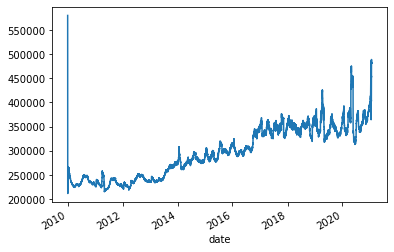

In [125]:
df_recent_dt.rolling(window="30d")['price'].mean().plot()

<AxesSubplot:xlabel='date'>

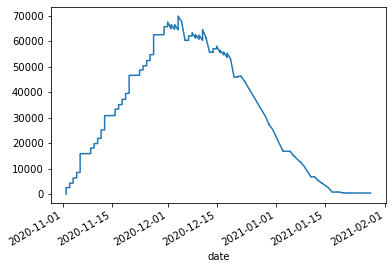

In [161]:
def nbr_in_window(ser):
    #return np.percentile(ser.to_numpy(), interpolation='lower', q=50)
    return ser.shape[0]

# with shape it is up to 70k items from 2020-11-01
df_very_recent = df_recent_dt.query('index > "2020-11-01"')
df_res = df_very_recent.rolling(window="30d")['price'].apply(nbr_in_window)
df_res.plot()

In [163]:
df_very_recent.shape, df_res.shape

((93475, 3), (93475,))

In [166]:
df_res.tail(10)

date
2021-01-22    430.0
2021-01-22    431.0
2021-01-22    432.0
2021-01-22    433.0
2021-01-22    434.0
2021-01-25    435.0
2021-01-25    436.0
2021-01-26    437.0
2021-01-26    438.0
2021-01-28    438.0
Name: price, dtype: float64

<AxesSubplot:xlabel='date'>

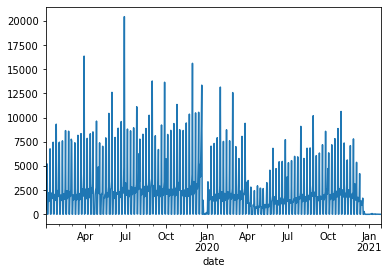

In [174]:
df_recent_dt.query('index > "2019-01-01"').resample(rule='1D').size().plot()

<AxesSubplot:xlabel='date'>

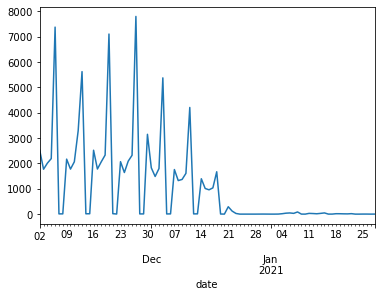

In [170]:
df_very_recent.resample(rule="1D").size().plot()

In [189]:
def nbr_in_window(ser):
    #return np.percentile(ser.to_numpy(), interpolation='lower', q=50)
    return ser.shape[0]

# with shape it is up to 70k items from 2020-11-01
df_very_recent = df_recent_dt.query('index > "2020-09-01"')
#df_res.plot()

In [190]:
%%time 

df_res = df_very_recent.rolling(window="30d")['price'].apply(nbr_in_window)

CPU times: user 18.4 s, sys: 7.02 ms, total: 18.5 s
Wall time: 18.5 s


In [191]:
%%time 

df_res = df_very_recent.rolling(window="30d")['price'].apply(nbr_in_window, engine='numba', raw=True)

CPU times: user 9.56 s, sys: 19.2 ms, total: 9.58 s
Wall time: 9.56 s


In [192]:
%%time 

engine_kwargs = {'nopython': True, 'nogil': True, 'parallel': True}

df_res = df_very_recent.rolling(window="30d")['price'].apply(nbr_in_window, engine='numba', raw=True, engine_kwargs=engine_kwargs)

CPU times: user 9.17 s, sys: 17 ms, total: 9.18 s
Wall time: 9.13 s


In [193]:
%%time 

df_res = df_very_recent.rolling(window="30d")['price'].count()

CPU times: user 9.14 ms, sys: 0 ns, total: 9.14 ms
Wall time: 8.27 ms


In [194]:
def conservative_estimate(ser):
    #return np.percentile(ser.to_numpy(), interpolation='lower', q=50)
    if ser.shape[0] > 10:
        return np.median(ser)
    else:
        return np.min(ser)

# with shape it is up to 70k items from 2020-11-01
df_recent_dt.query('index > "2020-11-01"').rolling(window="30d")['price'].apply(conservative_estimate, engine='numba', raw=True)

date
2020-11-02    550000.0
2020-11-02    550000.0
2020-11-02    550000.0
2020-11-02    550000.0
2020-11-02    132000.0
                ...   
2021-01-25    302995.0
2021-01-25    302997.5
2021-01-26    303000.0
2021-01-26    302997.5
2021-01-28    303500.0
Name: price, Length: 93475, dtype: float64

In [195]:
%%time

df_recent_dt.query('index > "2020-11-01"').rolling(window="30d")['price'].apply(conservative_estimate, engine='numba', raw=True)

CPU times: user 1min, sys: 196 ms, total: 1min
Wall time: 1min


date
2020-11-02    550000.0
2020-11-02    550000.0
2020-11-02    550000.0
2020-11-02    550000.0
2020-11-02    132000.0
                ...   
2021-01-25    302995.0
2021-01-25    302997.5
2021-01-26    303000.0
2021-01-26    302997.5
2021-01-28    303500.0
Name: price, Length: 93475, dtype: float64

In [155]:
%%time 

df_recent_dt.query('index > "2020-11-01"').rolling(window="30d")['price'].apply(conservative_estimate, raw=True)

CPU times: user 1min 6s, sys: 97.1 ms, total: 1min 6s
Wall time: 1min 6s


date
2020-11-02         0.0
2020-11-02         0.0
2020-11-02         0.0
2020-11-02         0.0
2020-11-02         0.0
                ...   
2021-01-25    302995.0
2021-01-25    302997.5
2021-01-26    303000.0
2021-01-26    302997.5
2021-01-28    303500.0
Name: price, Length: 93475, dtype: float64

In [198]:
from numba import njit

conservative_estimate_njit = njit(conservative_estimate)

df_recent_dt.query('index > "2020-11-01"').rolling(window="30d")['price'].apply(conservative_estimate_njit, engine='numba', raw=True)

date
2020-11-02    550000.0
2020-11-02    550000.0
2020-11-02    550000.0
2020-11-02    550000.0
2020-11-02    132000.0
                ...   
2021-01-25    302995.0
2021-01-25    302997.5
2021-01-26    303000.0
2021-01-26    302997.5
2021-01-28    303500.0
Name: price, Length: 93475, dtype: float64

In [199]:
rolling = df_recent_dt.query('index > "2020-11-01"').rolling(window="30d")['price']


In [200]:
rolling.apply(conservative_estimate_njit, engine='numba', raw=True)

KeyboardInterrupt: 

In [213]:
%%time

# 15s numba vs 55s without
def conservative_estimate(ser):
    #return np.percentile(ser.to_numpy(), interpolation='lower', q=50)
    if ser.shape[0] > 10:
        return np.median(ser)
    else:
        return np.min(ser)

# with shape it is up to 70k items from 2020-11-01
df_recent_dt.query('index > "2020-10-01"').rolling(window="3d")['price'].apply(conservative_estimate, engine='numba', raw=True)

CPU times: user 15.6 s, sys: 87.5 ms, total: 15.6 s
Wall time: 15.6 s


date
2020-10-02    255000.0
2020-10-02    255000.0
2020-10-02    255000.0
2020-10-02    109000.0
2020-10-02    109000.0
                ...   
2021-01-25    122500.0
2021-01-25    122500.0
2021-01-26    122500.0
2021-01-26     45000.0
2021-01-28     45000.0
Name: price, Length: 169086, dtype: float64

In [214]:
%%time
df_recent_dt.query('index > "2020-10-01"').rolling(window="3d")['price'].apply(conservative_estimate)

CPU times: user 58.1 s, sys: 327 ms, total: 58.5 s
Wall time: 58.5 s


date
2020-10-02    255000.0
2020-10-02    255000.0
2020-10-02    255000.0
2020-10-02    109000.0
2020-10-02    109000.0
                ...   
2021-01-25    122500.0
2021-01-25    122500.0
2021-01-26    122500.0
2021-01-26     45000.0
2021-01-28     45000.0
Name: price, Length: 169086, dtype: float64

In [215]:
rolling = df_recent_dt.query('index > "2020-10-01"').rolling(window="3d")['price']

In [144]:
df_recent_dt.query('index == "2020-11-27"').shape

(7798, 3)

In [ ]:
# want 95% percentile if size is large, else

# Experiment

In [201]:
#https://pandas.pydata.org/pandas-docs/stable/user_guide/window.html#window-numba-engine
    
data = pd.Series(range(1_000_000))
roll = data.rolling(10)

def f(x):
    return np.sum(x) + 5

In [202]:
%timeit -r 1 -n 1 roll.apply(f, engine='numba', raw=True)

533 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [203]:
# cache benefit
%timeit roll.apply(f, engine='numba', raw=True)

138 ms ± 2.75 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
engine_kwargs = {'nopython': True, 'nogil': False, 'parallel': True}
%timeit roll.apply(f, engine='numba', raw=True, engine_kwargs=engine_kwargs)

In [204]:
%timeit roll.apply(f, engine='cython', raw=True)

4.73 s ± 20.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [206]:
# no obvious cache benefit
%timeit roll.apply(f, engine='cython', raw=True)

4.75 s ± 24.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [205]:
%timeit roll.apply(f)

KeyboardInterrupt: 

# Extract "is_cottage", groupby mean

# TEMP

In [ ]:
dfx = pd.DataFrame({'a': [np.nan, 1, 2, 2, 3], 'b': [1, 1, 1, 1, 1]})
dfx.groupby('a', dropna=False).size()

In [ ]:
dfx.a.value_counts(dropna=False)